In [127]:
import pandas as pd
import json
import numpy as np


In [128]:
df = pd.read_json("benefits_transformed.json")
df = df.dropna(subset=['embeddings'])
len(df)

# load task_transformed.json
with open('benefits_transformed.json') as json_file:
    data = json.load(json_file)

# save all embeddings in a 2d array
embeddings = []

for task in data:
    if task['embeddings'] is not None:
        embeddings.append(task['embeddings'])

# convert embeddings to numpy array
X = np.array(embeddings)
X.shape

(61, 1536)

In [129]:
#standardize X
from sklearn.preprocessing import StandardScaler
# X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
scaler = StandardScaler()
scaler.fit(X)
standardised_X = scaler.transform(X)
print(np.std(standardised_X,axis=0))
print(np.mean(standardised_X,axis=0))


[1. 1. 1. ... 1. 1. 1.]
[ 1.35592812e-16 -1.34682793e-16 -3.27606794e-16 ...  2.36604907e-17
  2.05664265e-16 -6.80694117e-16]


In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


In [131]:
#get pca percentage
pca.explained_variance_ratio_

array([0.24161481, 0.14099331])

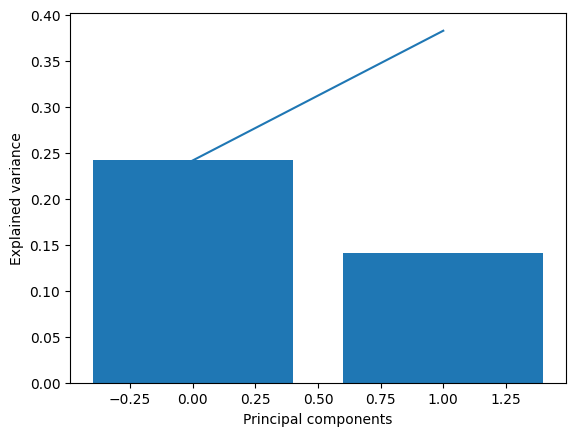

In [132]:
#scree plot
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# display bar plot too
plt.bar(range(2), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.show()

In [133]:
# try t-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
tsne_results.shape



[t-SNE] Computing 60 nearest neighbors...
[t-SNE] Indexed 61 samples in 0.001s...
[t-SNE] Computed neighbors for 61 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 61 / 61
[t-SNE] Mean sigma: 0.269117
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.210159
[t-SNE] KL divergence after 300 iterations: 0.144855


(61, 2)

In [134]:
X = np.vstack(X_pca)
# X = np.vstack(tsne_results)

kmeans.fit(X)
dbscan.fit(X)
predict = dbscan.fit_predict(X)
from sklearn.metrics import silhouette_score

silhouette_score(X, predict)

In [135]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

kmeans = KMeans(n_clusters=3,random_state=0,n_init="auto")
kmeans.fit(X)

predict = kmeans.fit_predict(X)

from sklearn.metrics import silhouette_score

silhouette_score(X, predict)

0.6983442644752241

predict = kmeans.fit_predict(X)

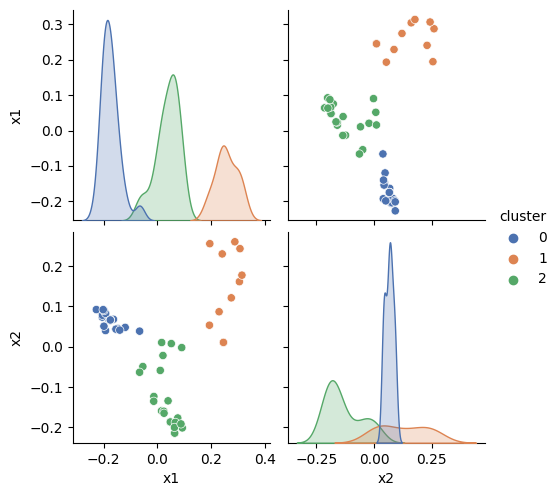

In [136]:
#df_benefits exclude ebmeddings
result = df.drop(['embeddings'], axis=1)
result['cluster'] = predict

#spread X to 3 columns and add to result
result['x1'] = X[:,0]
result['x2'] = X[:,1]
# result['x3'] = X[:,2]
#plot clusters
import seaborn as sns
import matplotlib.pyplot as plt

#pairplot x,y,z, cluster
sns.pairplot(result[['x1','x2','cluster']], hue="cluster", palette="deep")
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.5406085605994598
For n_clusters = 3 The average silhouette_score is : 0.6983442644752241
For n_clusters = 4 The average silhouette_score is : 0.6687752295217891
For n_clusters = 5 The average silhouette_score is : 0.6446049494189244
For n_clusters = 6 The average silhouette_score is : 0.6746415460861075
For n_clusters = 7 The average silhouette_score is : 0.5801660834305832
For n_clusters = 8 The average silhouette_score is : 0.5029687665454099
For n_clusters = 9 The average silhouette_score is : 0.509742324280159
For n_clusters = 10 The average silhouette_score is : 0.5025335121225676


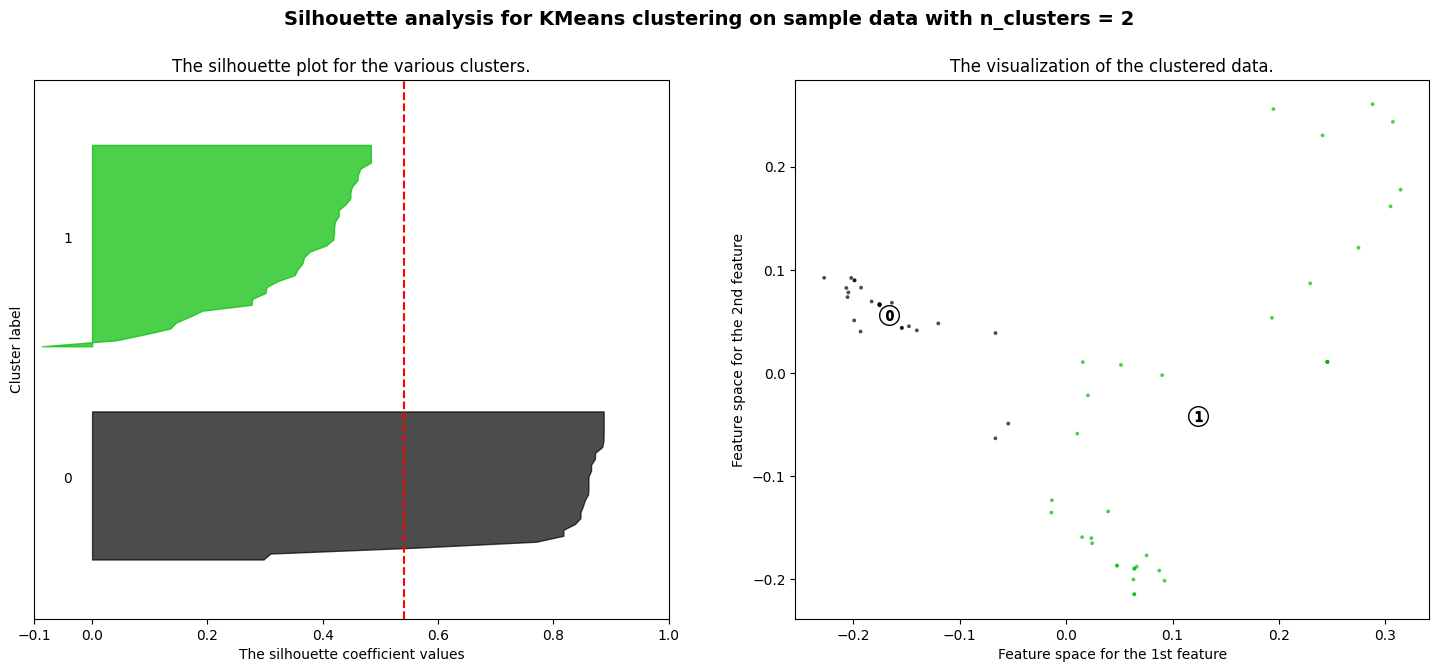

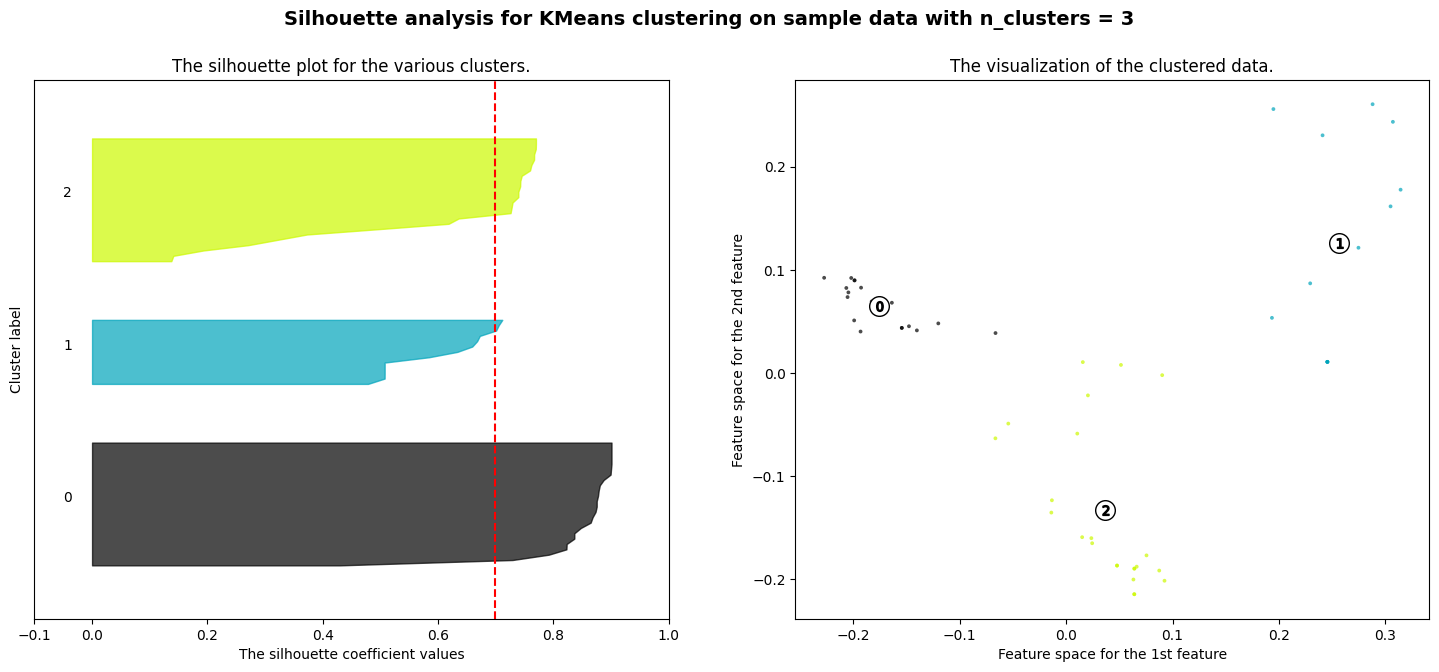

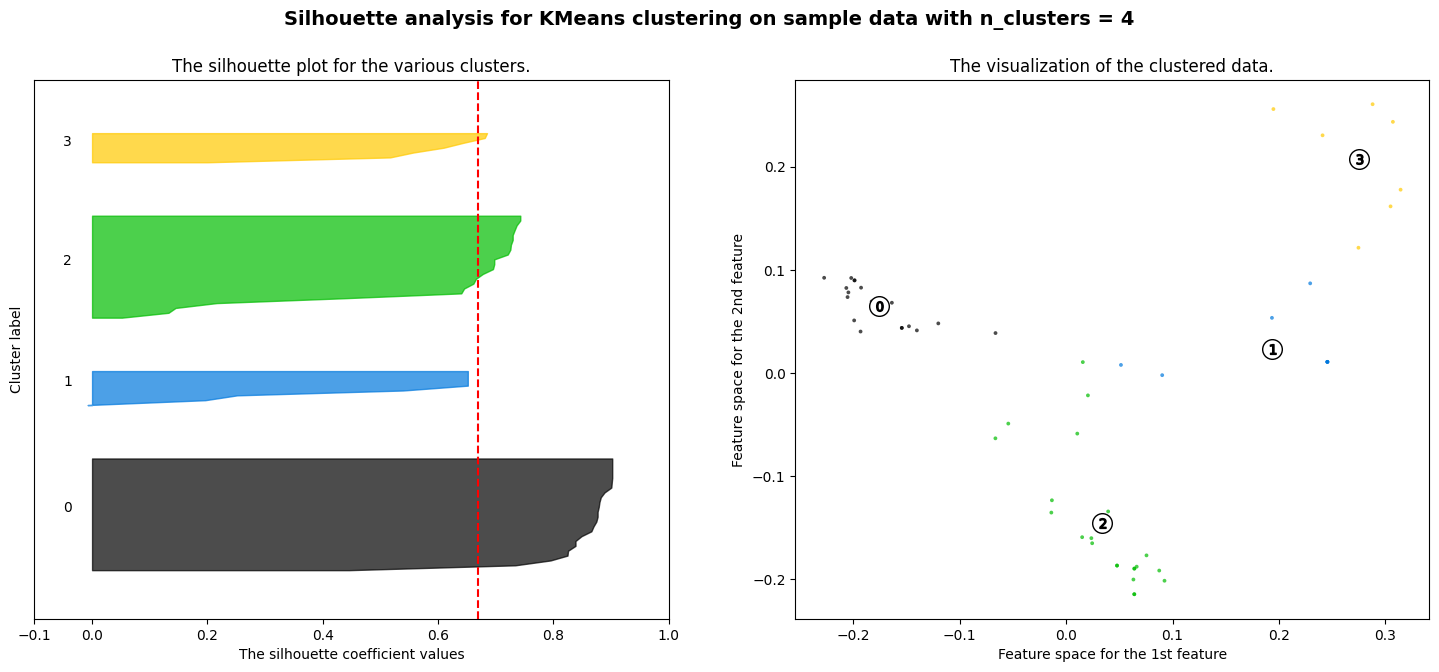

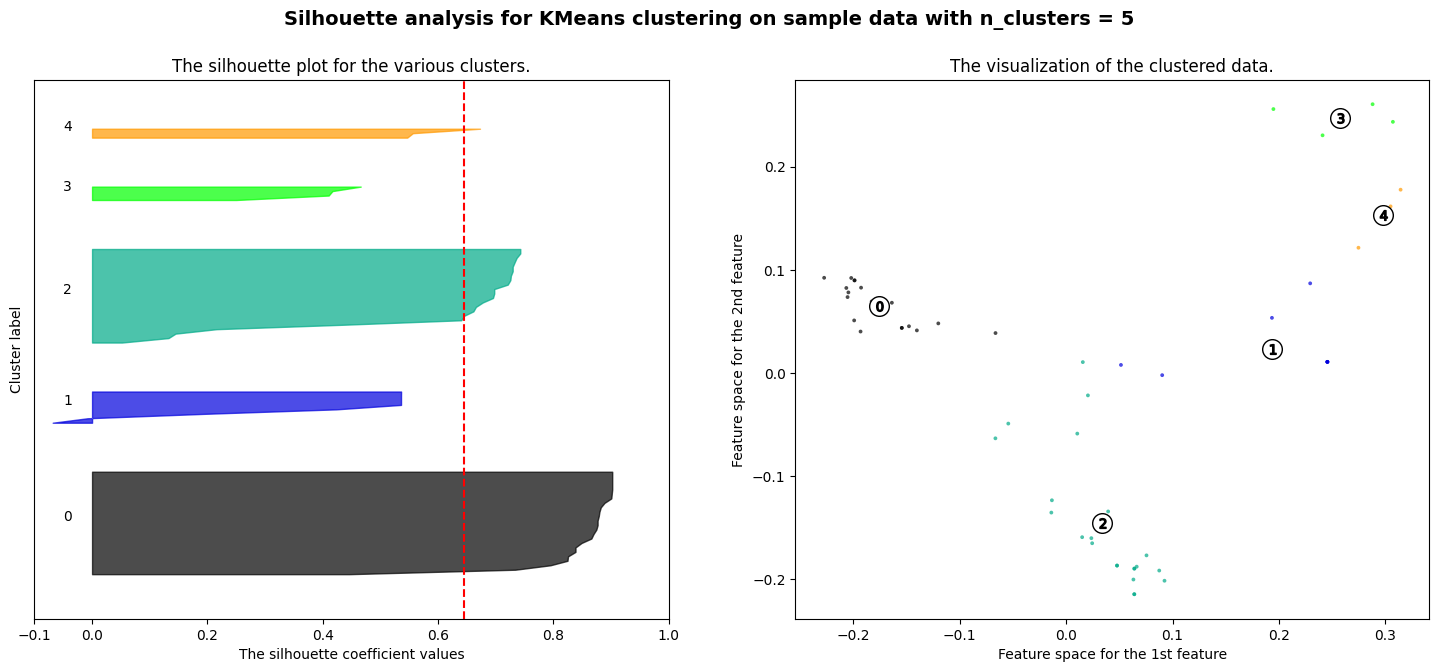

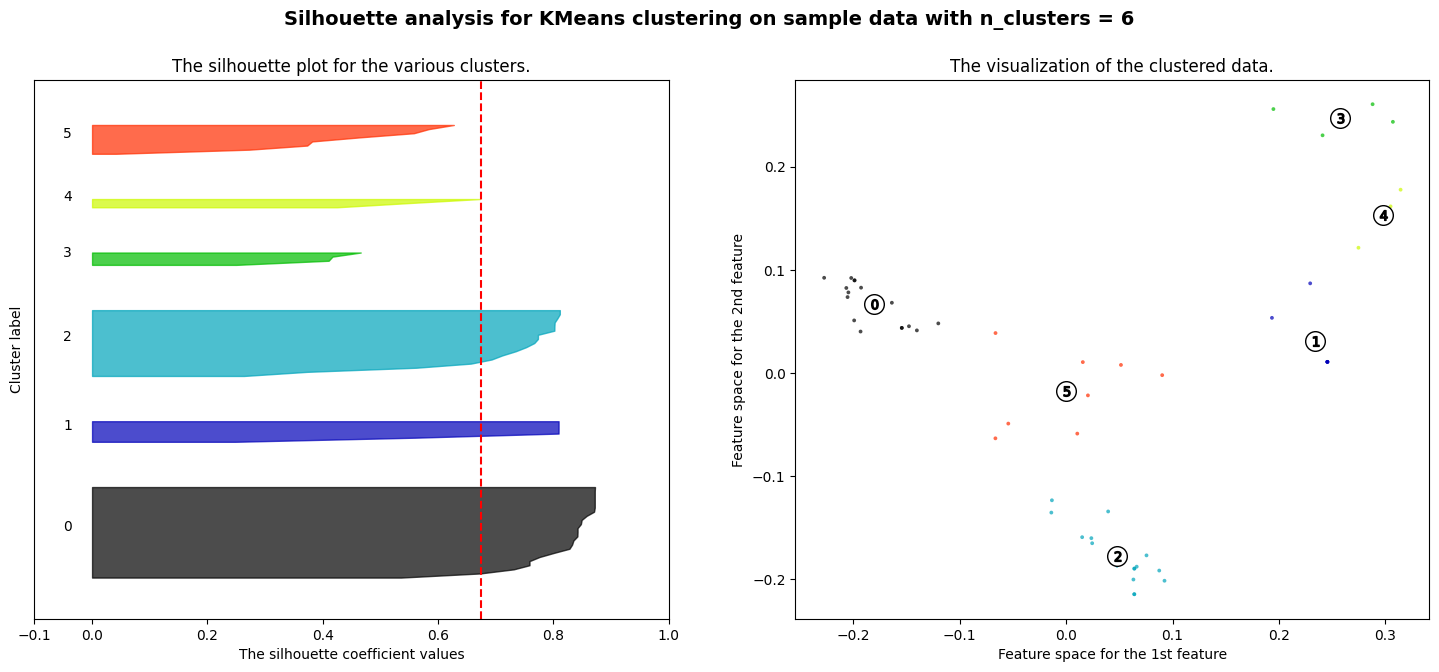

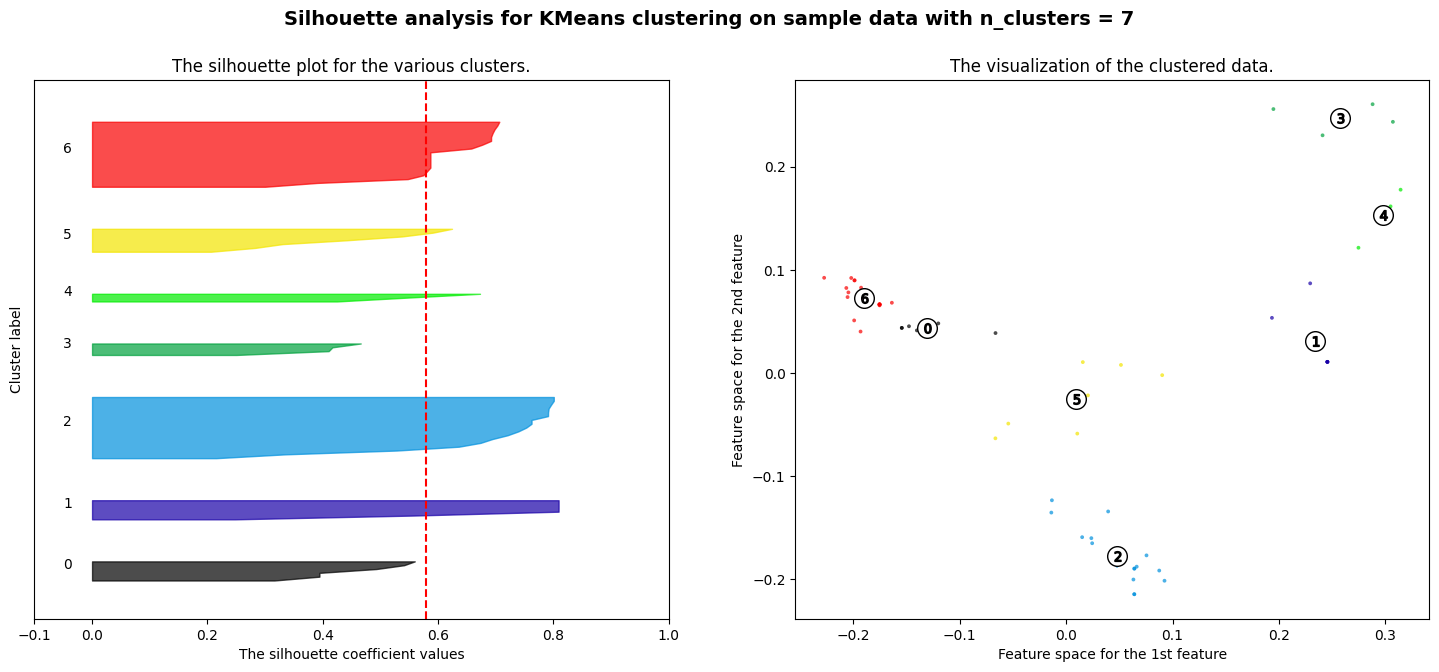

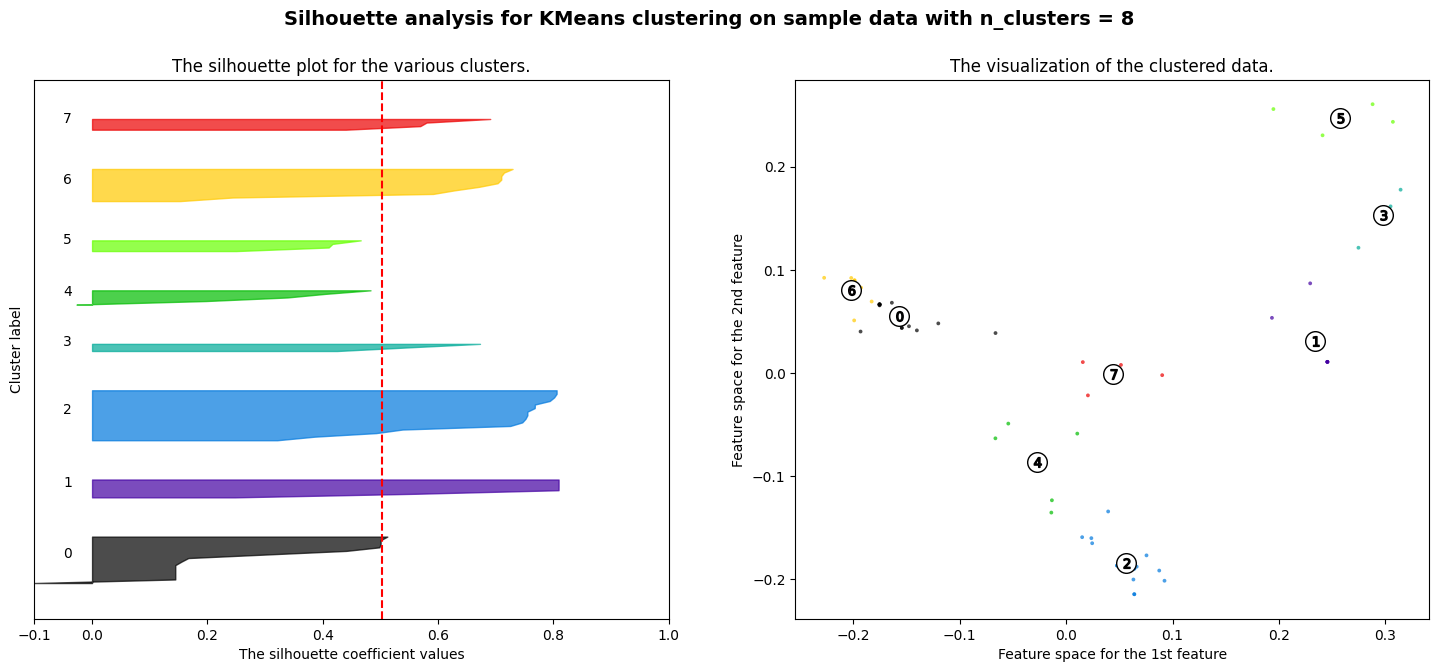

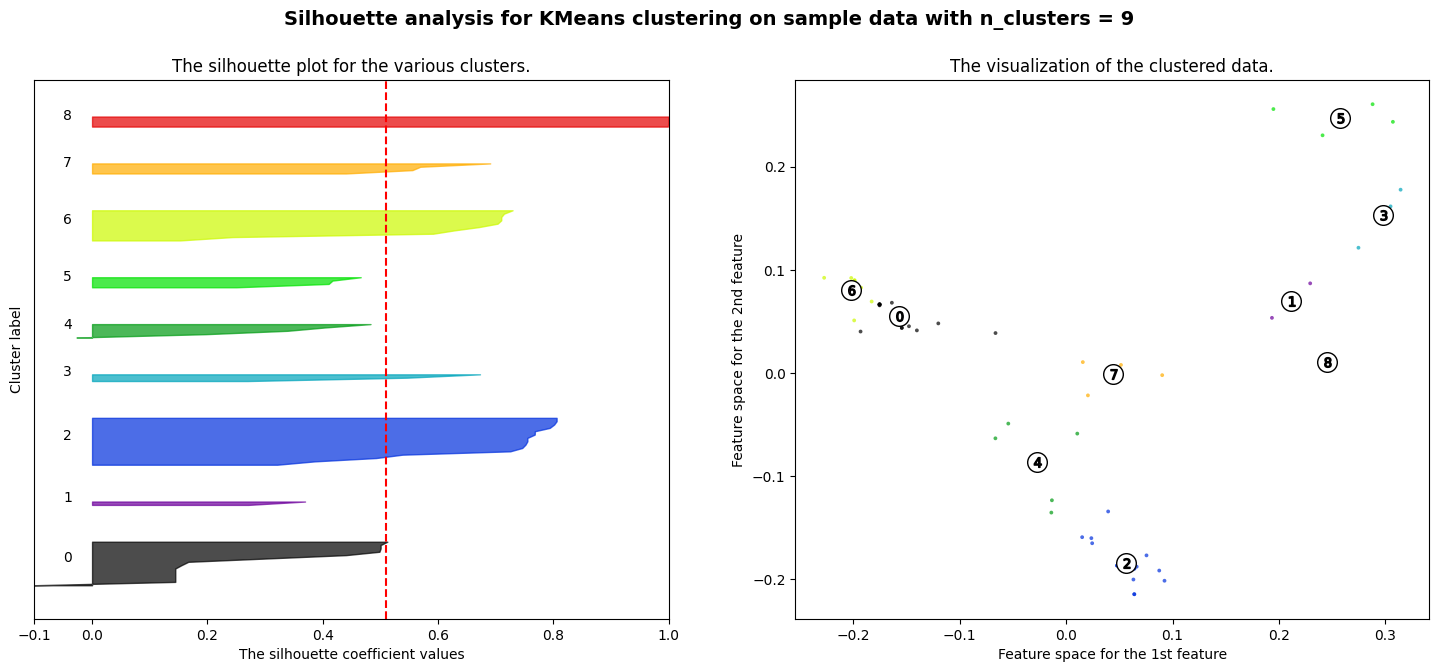

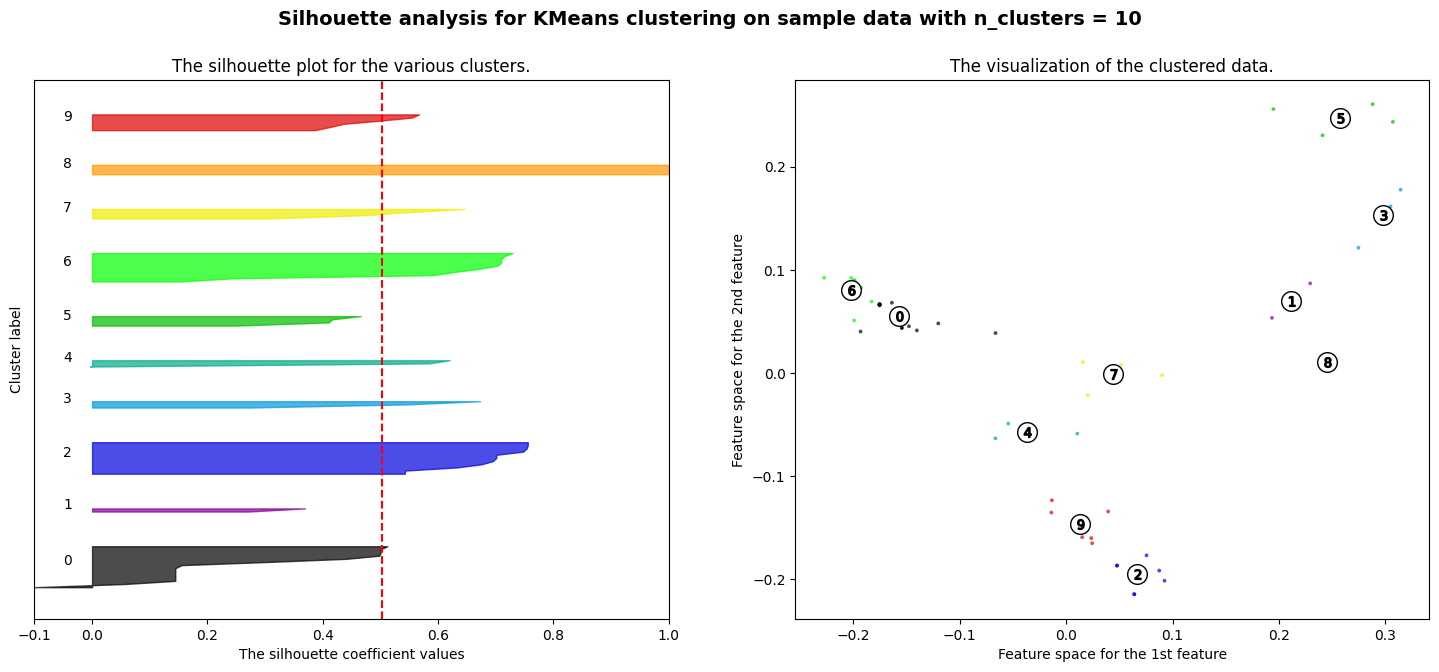

In [137]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [124]:
result.loc[result['cluster'] == 0]

,id,tasks,cluster,x1,x2
1,1,Enhance the app's download speed,0,-0.017695,0.114697
2,1,Increase the app's stability,0,-0.006376,0.206069
3,2,Fix the issue with displaying subfolders withi...,0,0.119929,0.196291
4,3,Fix the minor crashes,0,0.063833,0.287210
5,3,Improve the app's performance,0,-0.025414,0.153457
8,6,Fix the scaling issue to automatically fit ima...,0,-0.020422,0.183581
9,7,Fix the issue with comics not entering full sc...,0,0.217342,0.123728
27,22,Improve the compatibility with Google books,0,0.088175,0.016697
34,26,Improve the stability of the platform,0,-0.014427,0.199508
37,28,Improve page navigation,0,0.003837,0.085164


In [125]:
result.loc[result['cluster'] == 2]

,id,tasks,cluster,x1,x2
13,11,Add zoom feature for better reading experience,2,-0.172244,-0.094027
19,16,Add pinch zoom functionality,2,-0.267150,-0.000284
23,20,Add zoom functionality,2,-0.254176,-0.051958
24,20,Improve user interface,2,-0.050504,0.031000
25,21,Add zoom buttons,2,-0.190219,-0.042510
26,21,Implement pinch to zoom feature,2,-0.259055,0.033189
28,23,Add a user-friendly interface,2,-0.049332,-0.064118
30,23,Implement a search feature,2,-0.010074,-0.036035
32,25,Improve the user interface to enhance navigation,2,-0.056567,0.032498
36,28,Improve zooming functionality,2,-0.235871,0.057874


In [126]:
result.to_csv("test_kmeans_benefits.csv",index=False)